In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
data = pd.read_csv("SalaryData_Test(1).csv")
data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [3]:
from sklearn import preprocessing

In [4]:
label_encoder = preprocessing.LabelEncoder()
data['Salary']= label_encoder.fit_transform(data['Salary'])
data['occupation']= label_encoder.fit_transform(data['occupation'])
data['workclass']= label_encoder.fit_transform(data['workclass'])

In [5]:
data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,11th,7,Never-married,6,Own-child,Black,Male,0,0,40,United-States,0
1,38,2,HS-grad,9,Married-civ-spouse,4,Husband,White,Male,0,0,50,United-States,0
2,28,1,Assoc-acdm,12,Married-civ-spouse,10,Husband,White,Male,0,0,40,United-States,1
3,44,2,Some-college,10,Married-civ-spouse,6,Husband,Black,Male,7688,0,40,United-States,1
4,34,2,10th,6,Never-married,7,Not-in-family,White,Male,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,Bachelors,13,Never-married,9,Own-child,White,Male,0,0,40,United-States,0
15056,39,2,Bachelors,13,Divorced,9,Not-in-family,White,Female,0,0,36,United-States,0
15057,38,2,Bachelors,13,Married-civ-spouse,9,Husband,White,Male,0,0,50,United-States,0
15058,44,2,Bachelors,13,Divorced,0,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [6]:
data = data.drop({'education','educationno','maritalstatus','relationship','race','sex','capitalgain','capitalloss','native'},axis=1)
data

,age,workclass,occupation,hoursperweek,Salary
0,25,2,6,40,0
1,38,2,4,50,0
2,28,1,10,40,1
3,44,2,6,40,1
4,34,2,7,30,0
...,...,...,...,...,...
15055,33,2,9,40,0
15056,39,2,9,36,0
15057,38,2,9,50,0
15058,44,2,0,40,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   age           15060 non-null  int64
 1   workclass     15060 non-null  int32
 2   occupation    15060 non-null  int32
 3   hoursperweek  15060 non-null  int64
 4   Salary        15060 non-null  int32
dtypes: int32(3), int64(2)
memory usage: 411.9 KB


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'workclass'}>],
       [<AxesSubplot:title={'center':'occupation'}>,
        <AxesSubplot:title={'center':'hoursperweek'}>],
       [<AxesSubplot:title={'center':'Salary'}>, <AxesSubplot:>]],
      dtype=object)

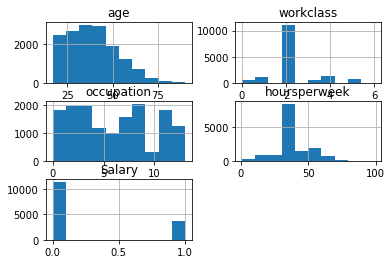

In [8]:
data.hist()

In [9]:
array = data.values
X = array[:,0:4]
Y = array[:,4]

In [10]:
X

array([[25,  2,  6, 40],
       [38,  2,  4, 50],
       [28,  1, 10, 40],
       ...,
       [38,  2,  9, 50],
       [44,  2,  0, 40],
       [35,  3,  3, 60]], dtype=int64)

In [11]:
Y

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3)

In [13]:
classifier = SVC()

In [14]:
classifier.fit(X_test, Y_test)

SVC()

In [15]:
score = classifier.score(X_train , Y_train)
score

0.7554543729842534